<a href="https://colab.research.google.com/github/athul8ts-droid/careerboost/blob/main/Employee_Attrition_Prediction_and_Workforce_Analytics_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Check for missing values in each column
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [3]:
# Drop unnecessary columns
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Check remaining columns
df.shape


(1470, 31)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create encoder object
le = LabelEncoder()

# Encode binary columns
binary_cols = ['Attrition', 'OverTime', 'Gender']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [5]:
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, drop_first=True)

# Check dataset shape
df.shape


(1470, 45)

In [6]:
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Count attrition values
attrition_count = df['Attrition'].value_counts()
print(attrition_count)


Attrition
0    1233
1     237
Name: count, dtype: int64


In [8]:
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_percent)


Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


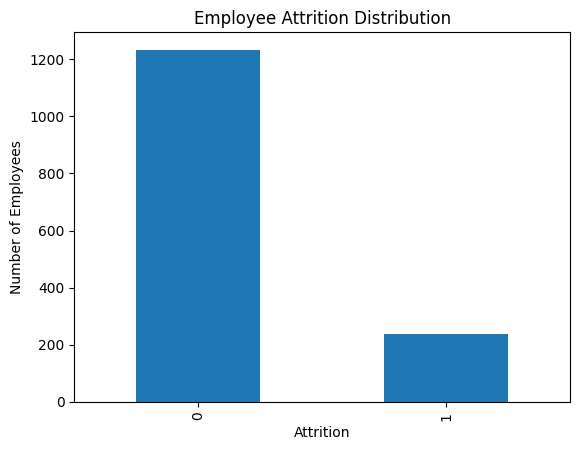

In [9]:
plt.figure()
attrition_count.plot(kind='bar')
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()


In [10]:
#Explanation

#This provides:
#Mean, median, standard deviation
#Minimum and maximum values
#It helps understand the overall distribution of numerical data.

df.describe()



,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,0.600000,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Figure size 640x480 with 0 Axes>

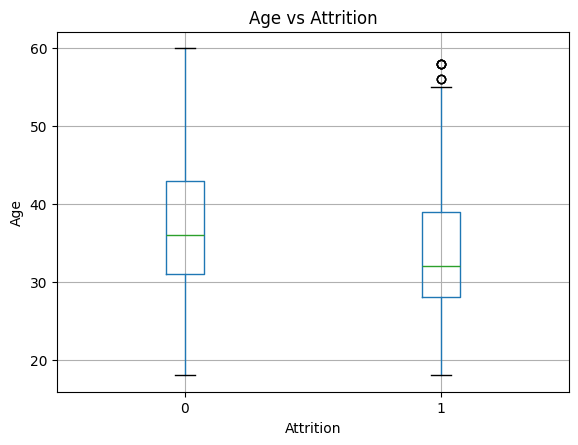

In [11]:
#attrition vs age

plt.figure()
df.boxplot(column='Age', by='Attrition')
plt.title('Age vs Attrition')
plt.suptitle('')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()


<Figure size 640x480 with 0 Axes>

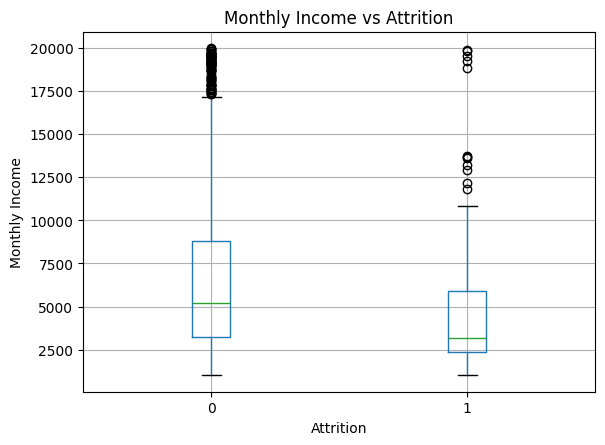

In [12]:
#Attrition vs Monthly Income

plt.figure()
df.boxplot(column='MonthlyIncome', by='Attrition')
plt.title('Monthly Income vs Attrition')
plt.suptitle('')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


<Figure size 640x480 with 0 Axes>

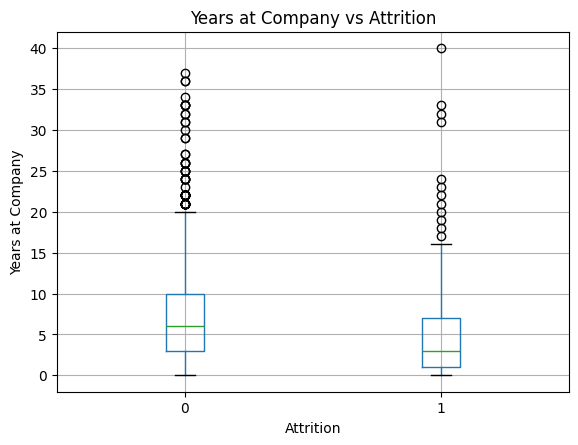

In [13]:
#Attrition vs Years at Company
plt.figure()
df.boxplot(column='YearsAtCompany', by='Attrition')
plt.title('Years at Company vs Attrition')
plt.suptitle('')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()


<Figure size 640x480 with 0 Axes>

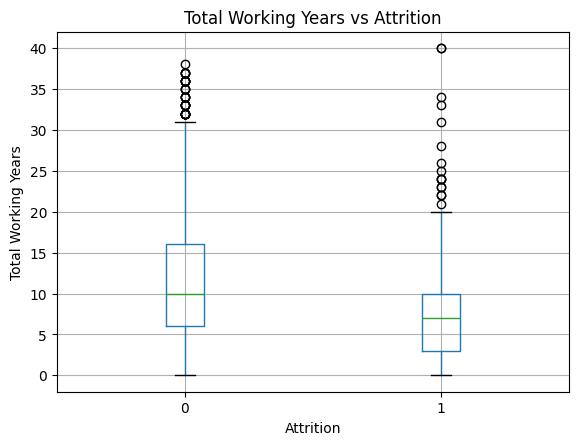

In [14]:
#Attrition vs Total Working Years
plt.figure()
df.boxplot(column='TotalWorkingYears', by='Attrition')
plt.title('Total Working Years vs Attrition')
plt.suptitle('')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()


In [15]:
df_raw = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


<Figure size 640x480 with 0 Axes>

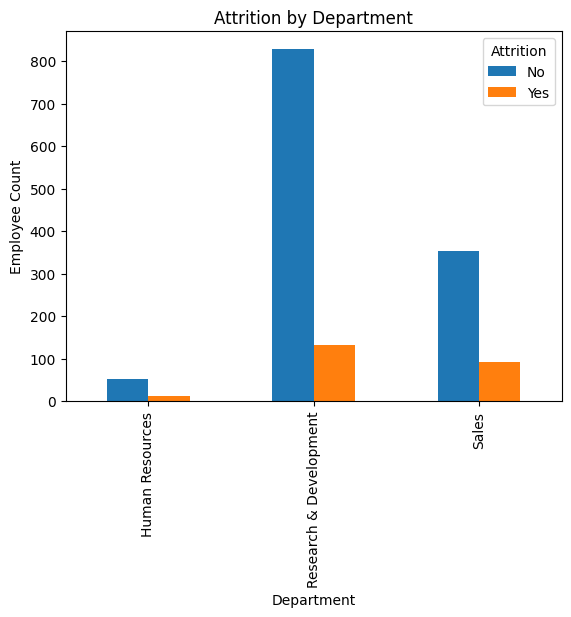

In [16]:
plt.figure()
pd.crosstab(df_raw['Department'], df_raw['Attrition']).plot(kind='bar')

plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Employee Count')

plt.show()



<Figure size 640x480 with 0 Axes>

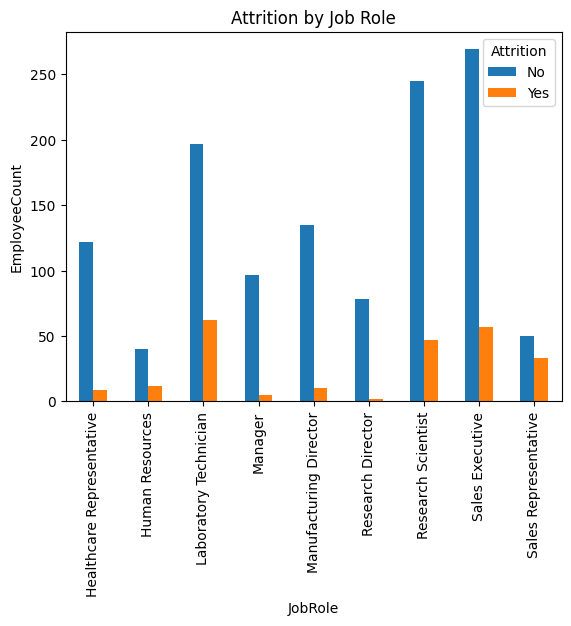

In [17]:
#Attrition vs Job Role
plt.figure()
pd.crosstab(df_raw['JobRole'], df_raw['Attrition']).plot(kind='bar')
plt.title('Attrition by Job Role')
plt.xlabel('JobRole')
plt.ylabel('EmployeeCount')
plt.show()


<Figure size 640x480 with 0 Axes>

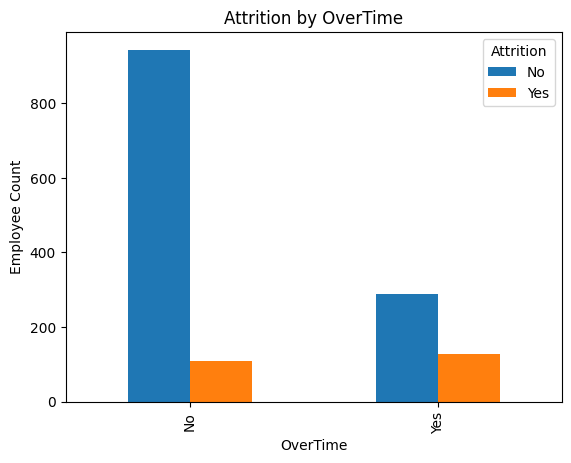

In [18]:
#Attrition vs OverTime
plt.figure()
pd.crosstab(df_raw['OverTime'], df_raw['Attrition']).plot(kind='bar')
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Employee Count')
plt.show()


<Figure size 640x480 with 0 Axes>

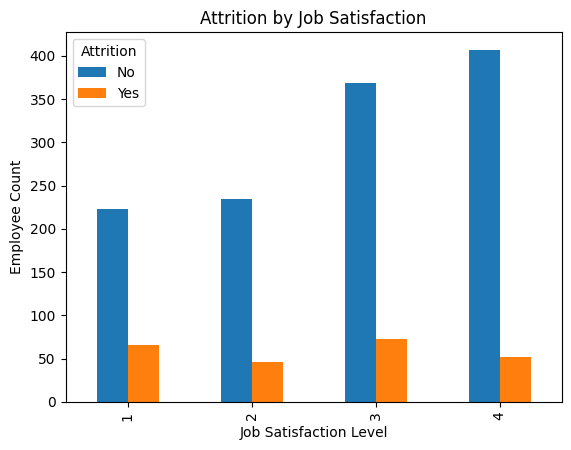

In [19]:
#Attrition vs Job Satisfaction
plt.figure()
pd.crosstab(df_raw['JobSatisfaction'], df_raw['Attrition']).plot(kind='bar')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Employee Count')
plt.show()


<Figure size 640x480 with 0 Axes>

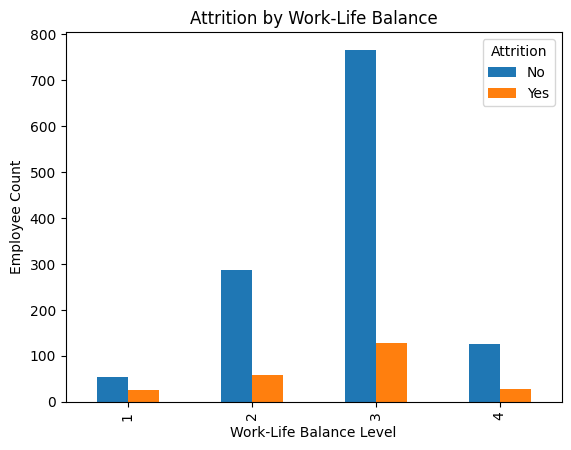

In [20]:
#Attrition vs Work-Life Balance
plt.figure()
pd.crosstab(df_raw['WorkLifeBalance'], df_raw['Attrition']).plot(kind='bar')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance Level')
plt.ylabel('Employee Count')
plt.show()


In [21]:
#checking attrition is  numeric
df['Attrition'].value_counts()


,count
Attrition,
0,1233
1,237


In [22]:
#Compute Correlation Matrix
corr_matrix = df.corr()


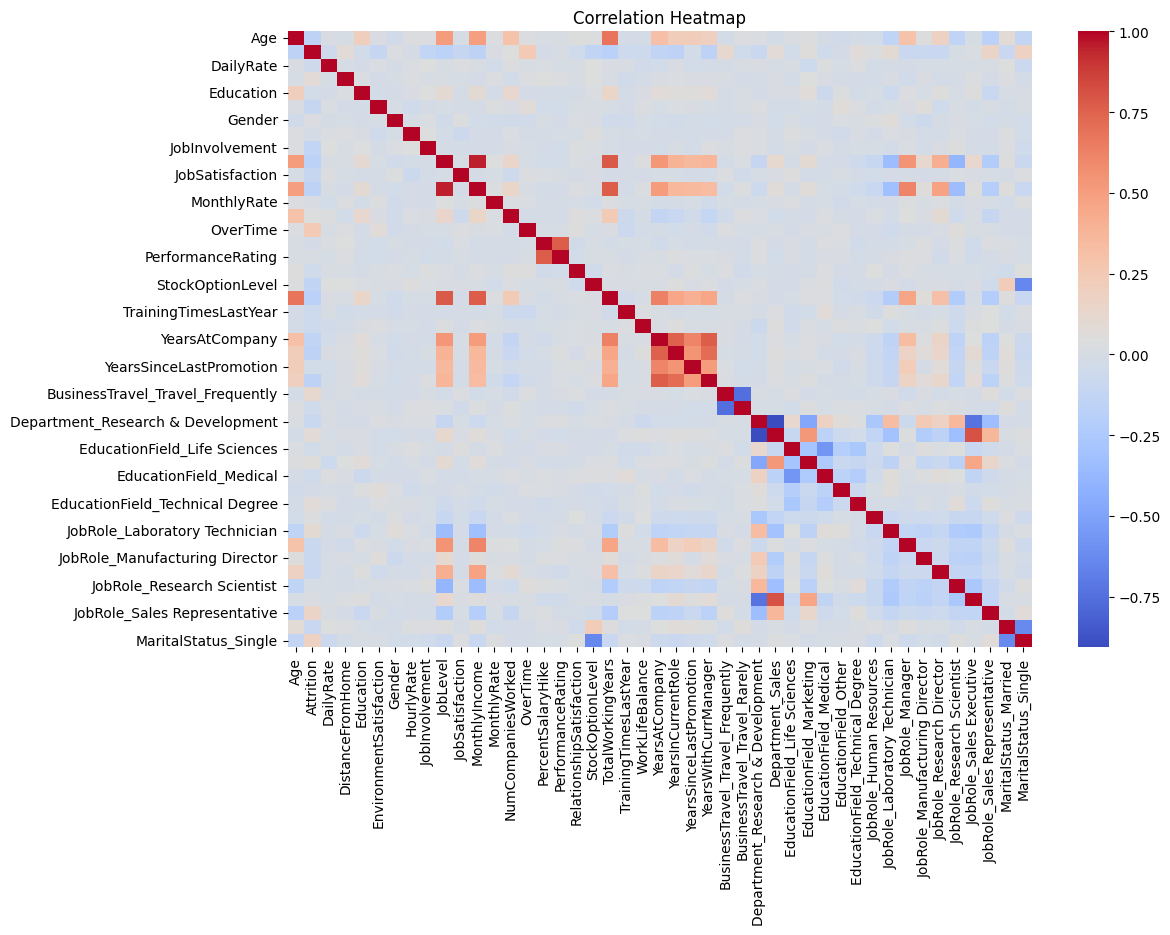

In [23]:
#Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [24]:
#Correlation with Attrition
#Instead of seeing everything, focus only on Attrition.
attrition_corr = corr_matrix['Attrition'].sort_values(ascending=False)
attrition_corr


,Attrition
Attrition,1.000000
OverTime,0.246118
MaritalStatus_Single,0.175419
JobRole_Sales Representative,0.157234
BusinessTravel_Travel_Frequently,0.115143
JobRole_Laboratory Technician,0.098290
Department_Sales,0.080855
DistanceFromHome,0.077924
EducationField_Technical Degree,0.069355
EducationField_Marketing,0.055781


In [25]:
attrition_corr[abs(attrition_corr) > 0.1]


,Attrition
Attrition,1.000000
OverTime,0.246118
MaritalStatus_Single,0.175419
JobRole_Sales Representative,0.157234
BusinessTravel_Travel_Frequently,0.115143
EnvironmentSatisfaction,-0.103369
JobSatisfaction,-0.103481
JobInvolvement,-0.130016
YearsAtCompany,-0.134392
StockOptionLevel,-0.137145


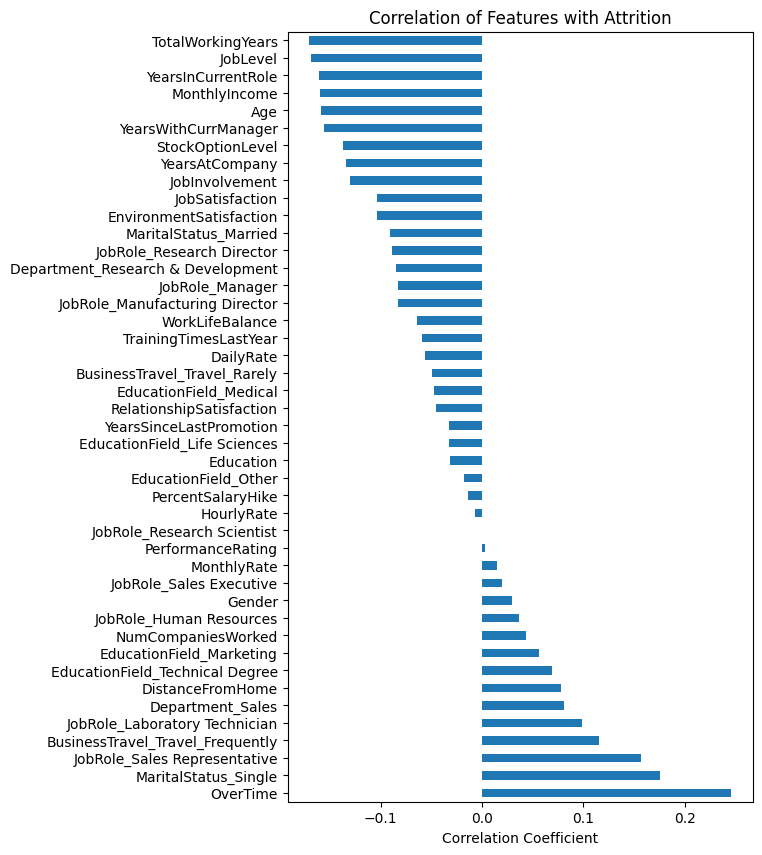

In [26]:
#Visualize Attrition Correlation
plt.figure(figsize=(6,10))
attrition_corr.drop('Attrition').plot(kind='barh')
plt.title("Correlation of Features with Attrition")
plt.xlabel("Correlation Coefficient")
plt.show()

MODEL BUILDING (Employee Attrition Prediction)

In [27]:
#Separate Features & Target
# Define target and features
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [28]:
#Train–Test Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [29]:
#Baseline Model – Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.8673469387755102
[[245   2]
 [ 37  10]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.83      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.87      0.83       294



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#Advanced Model – Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8299319727891157
[[240   7]
 [ 43   4]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



In [31]:
#Feature Importance
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
MonthlyIncome,0.073433
Age,0.061344
TotalWorkingYears,0.060342
DailyRate,0.055707
MonthlyRate,0.048766
HourlyRate,0.046927
DistanceFromHome,0.046624
YearsAtCompany,0.038927
OverTime,0.037340
YearsWithCurrManager,0.036816


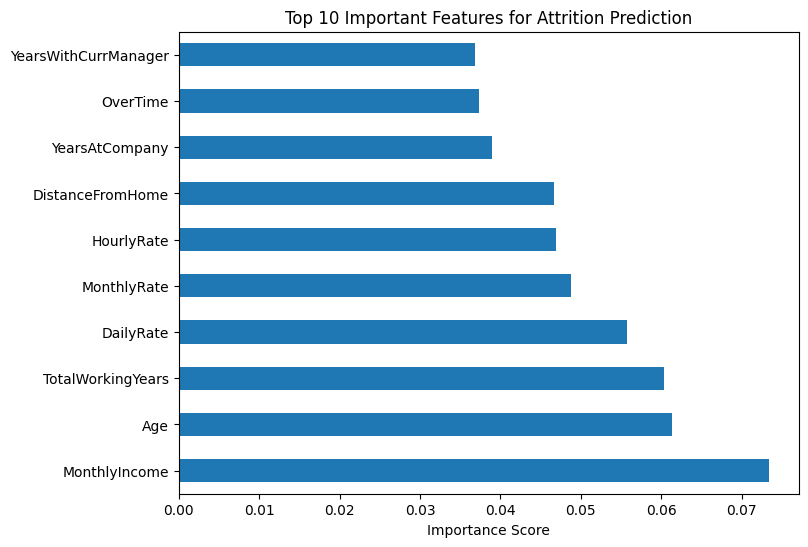

In [32]:
#Visualize Feature Importance
plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features for Attrition Prediction")
plt.xlabel("Importance Score")
plt.show()


In [33]:
#ROC–AUC Score
from sklearn.metrics import roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7776294254457748


In [34]:
#improve this model using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [35]:
#Re-evaluate Tuned Model
from sklearn.metrics import roc_auc_score

y_prob_best = best_rf.predict_proba(X_test)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_prob_best)

print("Tuned Random Forest ROC-AUC:", roc_auc_best)


Tuned Random Forest ROC-AUC: 0.799552071668533


In [36]:
# Create Power BI friendly dataset
df_bi = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Drop unnecessary columns (same as ML)
df_bi = df_bi.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Check
df_bi.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [37]:
#Export CLEANED CSV for Power BI
df_bi.to_csv("employee_attrition_cleaned.csv", index=False)

print("Power BI cleaned CSV created successfully!")


Power BI cleaned CSV created successfully!
